In [1]:
!pip install pyBibX

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.3/93.3 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.1/154.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 11.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 11.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.9/220.9 kB 24.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 86.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 83.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB

In [71]:
# Required Libraries
import numpy as np
import pandas as pd
import textwrap

from pyBibX.base import pbx_probe
from google.colab import data_table
from prettytable import PrettyTable

In [72]:
# Load .bib
# Arguments: file_bib = 'filename.bib'; db = 'scopus', 'wos', 'pubmed'; del_duplicated = True, False
file_name = 'SHAP.bib'
database  = 'scopus'
bibfile   = pbx_probe(file_bib = file_name, db = database, del_duplicated = True)

A Total of 22 Documents were Found ( 22 Documents and 0 Duplicates )

Article = 22


In [73]:
# Generate EDA (Exploratory Data Analysis) Report
report  = bibfile.eda_bib()

# Check Report
report

,Main Information,Results
0,Timespan,2020-2023
1,Total Number of Countries,1
2,Total Number of Institutions,1
3,Total Number of Sources,20
4,Total Number of References,0
5,Total Number of Languages,1
6,--unknow (# of docs),22
7,-//-,-//-
8,Total Number of Documents,22
9,--Article,22


In [74]:
# Check Docs IDs
data_table.DataTable(bibfile.table_id_doc, num_rows_per_page = 15)

,ID,Document
0,0,"Li, Liangbo and Pu, Cheng and Jin, Nenghao and..."
1,1,"Hang, Hoang Thi Thanh and Huy, Tran Trong and ..."
2,2,"Knitza, Johannes and Janousek, Lena and Kluge,..."
3,3,"Scavuzzo, Carlos Matias and Scavuzzo, Juan Man..."
4,4,"Eder, Matthias and Moser, Emanuel and Holzinge..."
5,5,"Shi, Songchang and Pan, Xiaobin and Zhang, Lih..."
6,6,"Gashi, Milot and Vuković, Matej and Jekic, Nik..."
7,7,"Li, Richard and Shinde, Ashwin and Liu, An and..."
8,8,"Kang, Danbee and Kim, Hyunsoo and Cho, Juhee a..."
9,9,"Assegie, Tsehay Admassu (2023). Evaluation of ..."


In [75]:
# Check Authors IDs
data_table.DataTable(bibfile.table_id_aut, num_rows_per_page = 15)

,ID,Author
0,a_0,"abels, elizabeth"
1,a_1,"acarkan, berk"
2,a_2,"ademoglu, ahmet"
3,a_3,"amini, arya"
4,a_4,"amparore, elvio"
...,...,...
188,a_188,"zheng, jianzhang"
189,a_189,"zhu, liang"
190,a_190,"zhu, siming"
191,a_191,"zhuang, yingfeng"


In [76]:
# Check Sources IDs
data_table.DataTable(bibfile.table_id_jou, num_rows_per_page = 15)

,ID,Source
0,j_0,scientific reports
1,j_1,biomedinformatics
2,j_2,reviews in cardiovascular medicine
3,j_3,remote sensing
4,j_4,proceedings on engineering sciences
5,j_5,proceedings of engineering and technology inno...
6,j_6,peerj computer science
7,j_7,modern pathology
8,j_8,journal of hepatocellular carcinoma
9,j_9,jmir public health and surveillance


In [77]:
# Check Authors Keywords IDs
data_table.DataTable(bibfile.table_id_kwa, num_rows_per_page = 15)

,ID,KWA
0,k_0,machine learning
1,k_1,shap
2,k_2,radiomics
3,k_3,prediction model
4,k_4,lime
...,...,...
75,k_75,artificial neural networks
76,k_76,application
77,k_77,algorithm
78,k_78,acute kidney injury


In [78]:
# Check Keywords Plus IDs
data_table.DataTable(bibfile.table_id_kwp, num_rows_per_page = 15)

,ID,KWP
0,p_0,machine learning
1,p_1,human
2,p_2,article
3,p_3,support vector machine
4,p_4,male
...,...,...
324,p_324,acute hemorrhagic pancreatitis
325,p_325,accuracy
326,p_326,3d-printing
327,p_327,3d printing


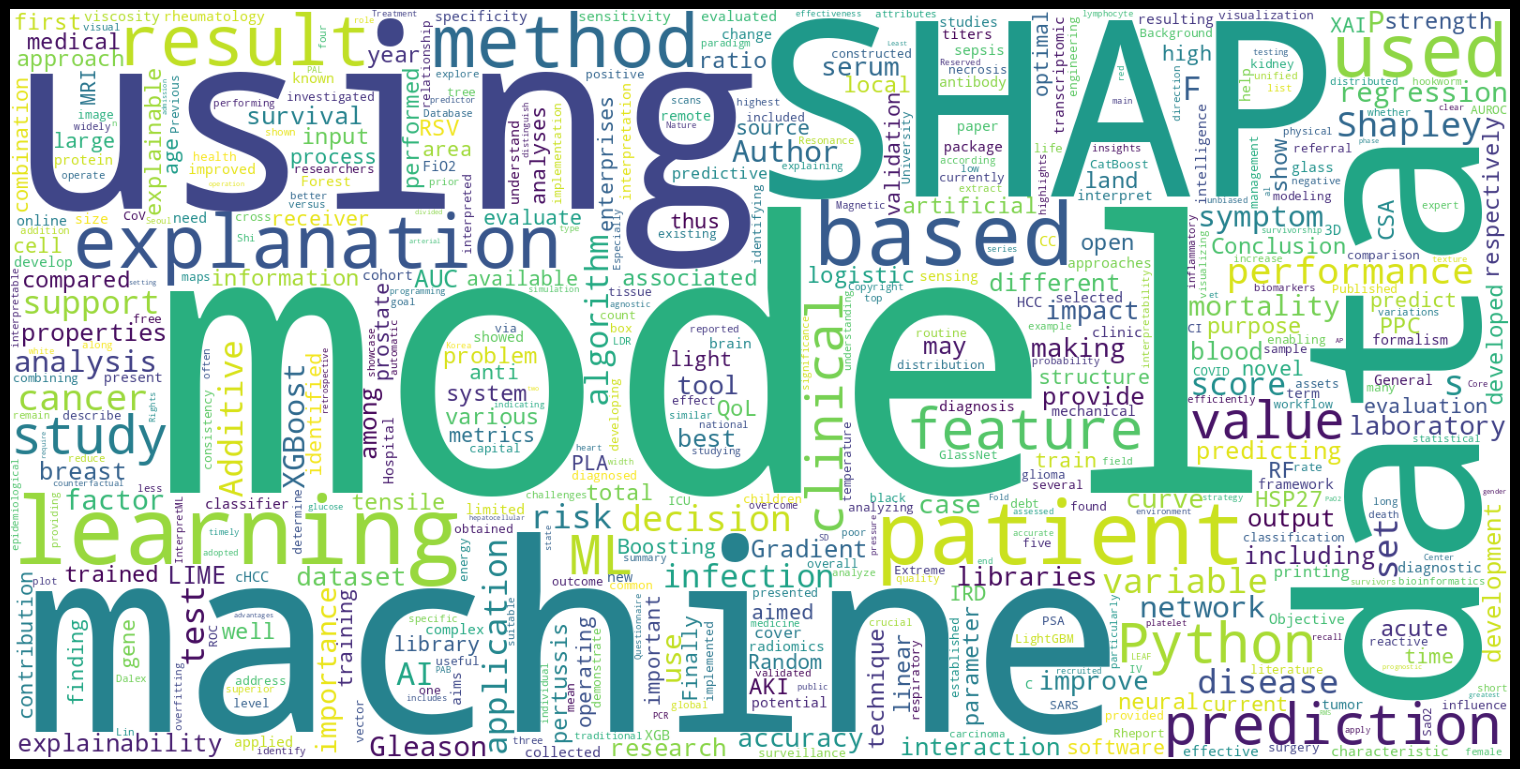

In [79]:
# WordCloud from the Abstracts, Title, Authors Keywords or Keywords Plus
# Arguments: entry = 'abs', 'title', 'kwa', or 'kwp'
bibfile.word_cloud_plot(entry = 'abs', size_x = 15, size_y = 10, wordsn = 500)

In [80]:
# Check Table
table             = PrettyTable()
data_wd           = bibfile.ask_gpt_wd
table.field_names = ['Word', 'Importance']
for key, value in data_wd.items():
    table.add_row([key, round(value, 4)])
print(table)

+------------------+------------+
|       Word       | Importance |
+------------------+------------+
|      model       |    1.0     |
|     machine      |   0.3978   |
|      using       |   0.3871   |
|       data       |   0.3763   |
|       SHAP       |   0.3763   |
|     learning     |   0.3548   |
|     patient      |   0.3118   |
|      based       |   0.3011   |
|   explanation    |   0.3011   |
|      method      |   0.3011   |
|       used       |   0.2903   |
|      result      |   0.2688   |
|    prediction    |   0.2473   |
|     feature      |   0.2473   |
|      Python      |   0.2366   |
|        ML        |   0.2366   |
|      study       |   0.2151   |
|      value       |   0.2043   |
|     clinical     |   0.1935   |
|   performance    |   0.1828   |
|      cancer      |   0.172    |
|     decision     |   0.1613   |
|        s         |   0.1613   |
|     Shapley      |   0.1505   |
|       set        |   0.1505   |
|     variable     |   0.1505   |
|     disease 

In [81]:
# Check Table
data_ng = bibfile.ask_gpt_ng
data_table.DataTable(data_ng, num_rows_per_page = 15)

AttributeError: ignored

AttributeError: ignored

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 202, in _repr_javascript_module_
    return self._gen_js(self._preprocess_dataframe())
  File "/usr/local/lib/python3.10/dist-packages/google/colab/data_table.py", line 163, in _preprocess_dataframe
    if len(self._dataframe.columns) > self._max_columns:
AttributeError: 'int' object has no attribute 'columns'


<google.colab.data_table.DataTable object>

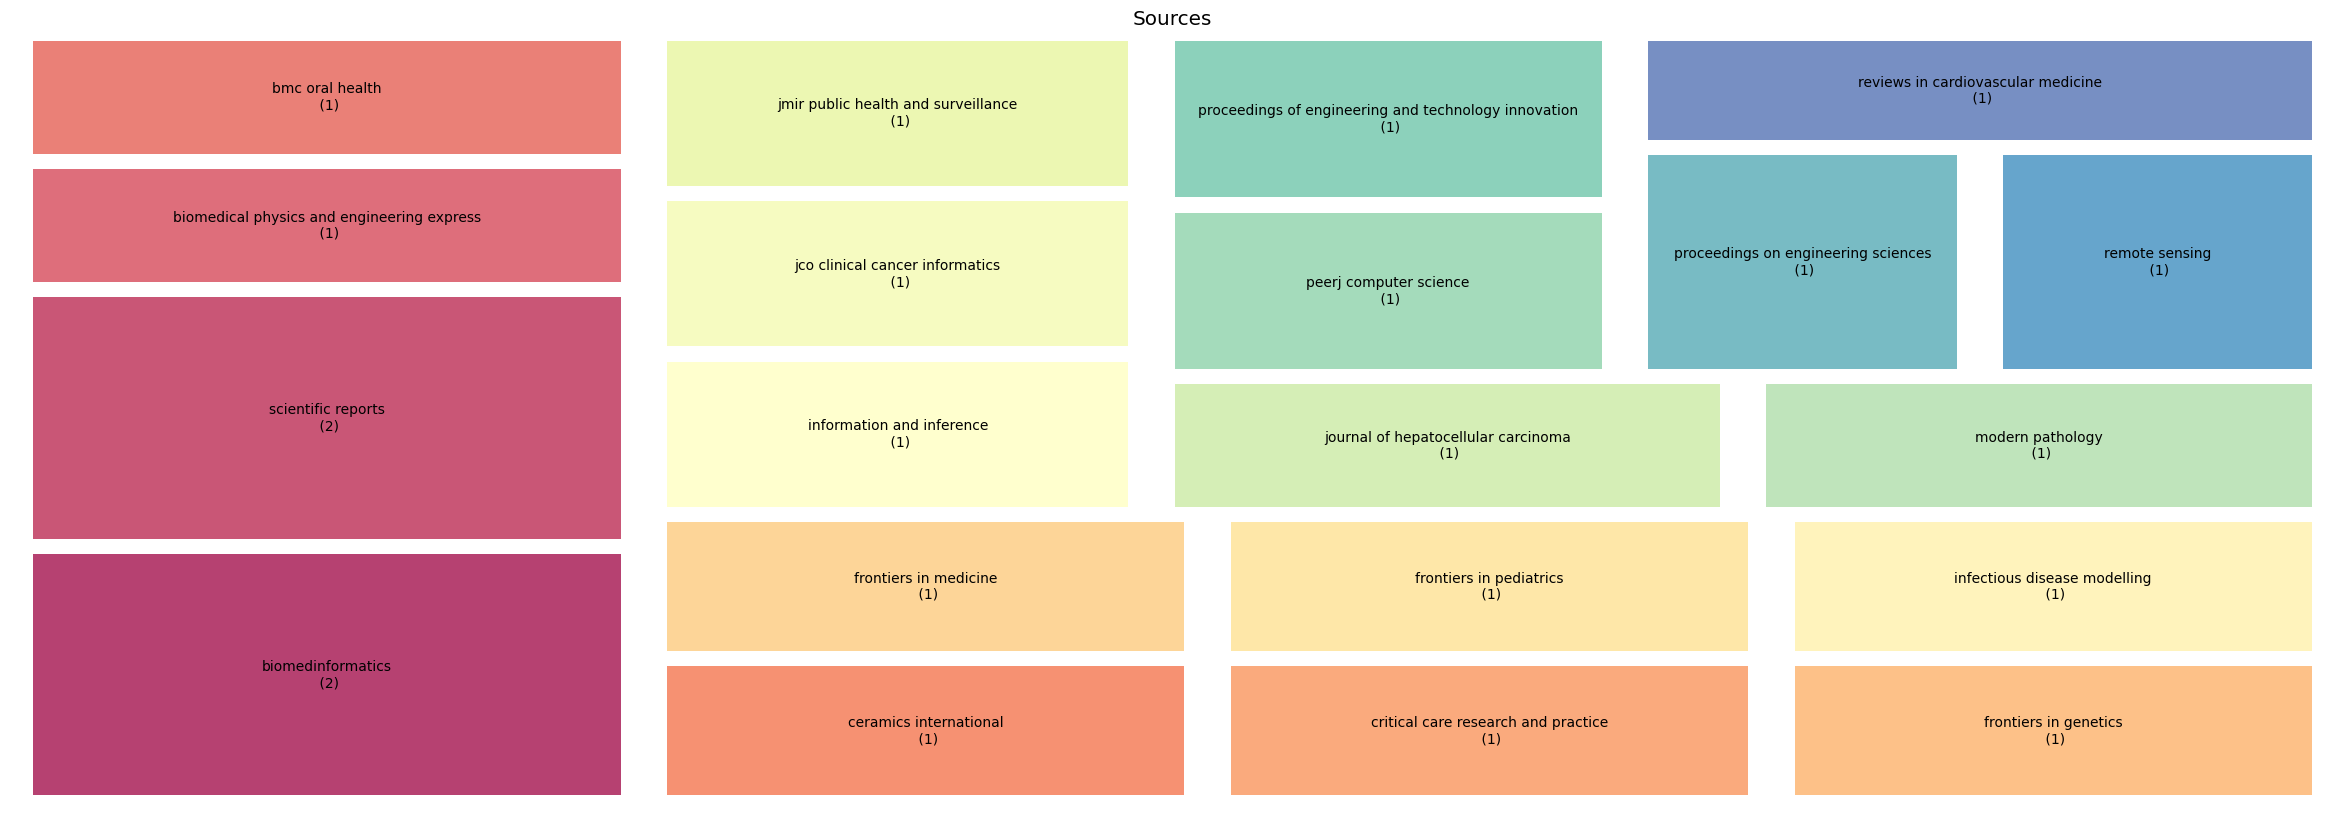

In [82]:
# Tree Map
# Arguments: entry = 'kwp', 'kwa', 'aut', 'jou', 'ctr', or 'inst';
#            topn  = Total number entities
bibfile.tree_map(entry = 'jou', topn = 20, size_x = 30, size_y = 10)

In [83]:
# NLP #-1 refers to all outliers and should typically be ignored.
# Arguments: stop_words        = A list of stopwords to clean the corpus. ['ar', 'bn', 'bg', 'cs', 'en', 'fi', 'fr', 'de', 'el', 'hi', 'he', 'hu', 'it', 'ja', 'ko',  'mr', 'fa', 'pl', 'pt-br', 'ro', 'ru', 'es', 'sv', 'sk', 'zh', 'th', 'uk'];
#                              'ar' = Arabic; 'bn' = Bengali; 'bg' = Bulgarian; 'cs' = Czech; 'en' = English; 'fi' = Finnish; 'fr' = French; 'de' = German; 'el' = Greek; 'he' = Hebrew;'hi' = Hindi; 'hu' = Hungarian; 'it' = Italian;
#                              'ja' = Japanese; 'ko' = Korean; 'mr' =  Marathi; 'fa' =  Persian; 'pl' =  Polish; 'pt-br' = Potuguese-Brazilian; 'ro' = Romanian; 'ru' = Russian; 'es' =  Spanish; 'sk' = Slovak; 'sv' = Swedish;
#                              'zh' = Chinese; 'th' = Thai; 'uk' = Ukrainianian;   'es' =  Spanish;  'sv' = Swedish
#            rmv_custom_words  = A list of custom stopwords to clean the corpus;
#            embeddings        = True or False. If True then word embeddings are used to create the topics
bibfile.topics_creation(stop_words = ['en'], rmv_custom_words = [], embeddings = False)

   Topic  Count                          Name  \
0     -1     22  -1_model_models_machine_shap   

                                      Representation  \
0  [model, models, machine, shap, data, learning,...   

                                 Representative_Docs  
0  [objective aimed develop year survival predict...  


In [84]:
# NLP
# Each document Topic
topics = bibfile.topics

In [85]:
# NLP
# Each document Probability to belong a Topic
probs = bibfile.probs

In [86]:
# NLP
# Arguments: view = 'notebook', 'browser' ('notebook' -> To plot in your prefered Notebook App. 'browser' -> To plot in your prefered browser window)
bibfile.graph_topics(view = 'notebook')